In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from typing import Union
from collections.abc import Callable
from functools import partial

In [3]:
def rk4(f: Callable[[float, np.ndarray], np.ndarray], y0: np.ndarray, t0: float, tmax: float, n: int=10000)->tuple[np.ndarray, np.ndarray]:
    """
    Runge-Kutta method for numeric integration for an equation of the form dy/dt = f(t, y).
    f: function f(t, y) that returns the derivative at a certain point.
    y0: vector that contains the starting conditions
    t0, tmax: start and end time
    n: number of steps
    reference for Runge-Kutta method at https://en.wikipedia.org/wiki/Runge%E2%80%93Kutta_methods#The_Runge%E2%80%93Kutta_method
    returns: time, y
    """
    t = np.linspace(t0, tmax, n+1, endpoint=True)  # create n+1 evenly spaced points from t0 to tmax
    y = np.zeros(shape=(len(y0), len(t)))  # where the data will be stored
    y[:, 0] = y0  # set initial values
    h = t[1]-t[0]  # determine step size (distance between the points, always the same)

    for i in range(len(t)-1):  # loop over each step
        k1 = f(t[i], y[:, i])
        k2 = f(t[i]+h/2, y[:, i]+k1*h/2)
        k3 = f(t[i]+h/2, y[:, i]+k2*h/2)
        k4 = f(t[i]+h, y[:, i]+k3*h)
        y[:, i+1] = y[:, i] + 1/6*(k1+2*k2+2*k3+k4)*h  # set new value

    return t, y

In [4]:
def euler_forward(f: Callable[[float, np.ndarray], np.ndarray], y0: np.ndarray, t0: float, tmax: float, n: int=10000)->tuple[np.ndarray, np.ndarray]:
    """
    Simple euler method for numeric integration for an equation of the form dy/dt = f(t, y).
    f: function f(t, y) that returns the derivative at a certain point.
    y0: vector that contains the starting conditions
    t0, tmax: start and end time
    n: number of steps
    reference for euler method at https://en.wikipedia.org/wiki/Euler_method
    returns: time, y
    """
    t = np.linspace(t0, tmax, n+1, endpoint=True)  # create n+1 evenly spaced points from t0 to tmax
    y = np.zeros(shape=(len(y0), len(t)))  # where the data will be stored
    y[:, 0] = y0  # set initial values
    h = t[1]-t[0]  # determine step size (distance between the points, always the same)

    for i in range(len(t)-1):  # loop over each step
        dy = f(t[i], y[:, i])*h  # derivative at our point times step size
        y[:, i+1] = y[:, i] + dy

    return t, y

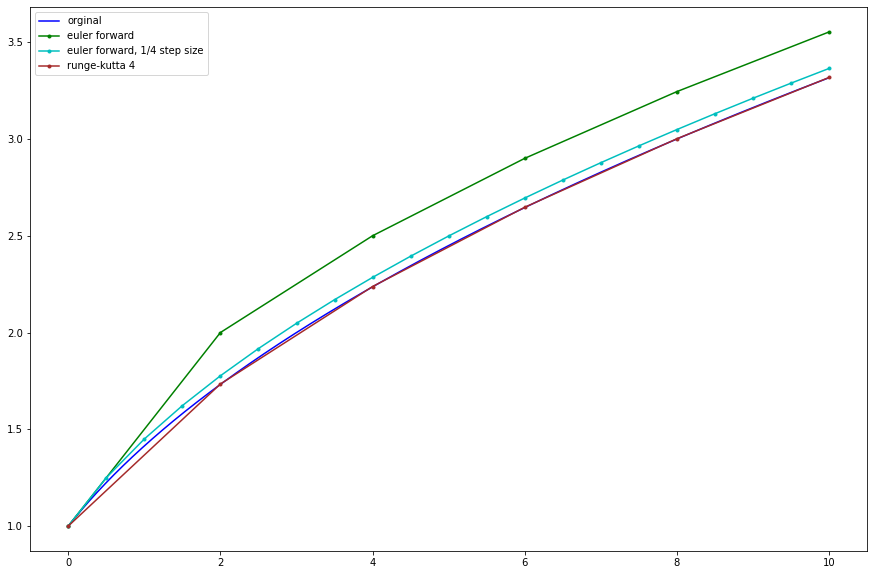

In [5]:
## testing euler forward and RK4 methods

def F(t):  # a function for testing where the derivative can be expressed in terms of the function itself
    return np.sqrt(t+1)

def f(t, y):
    # return the derivative of F, expressed in terms of y
    # d/dt y = d/dt sqrt(t+1) = 1/(2*sqrt(t+1)) = 1/(2*y) = f(t, y)
    return 1/(2*y)


t_orig = np.linspace(0, 10, 1000)
y_orig = F(t_orig)

n0 = 5  # simulation steps
t_ef, y_ef = euler_forward(f, y0=np.array([1]), t0=0, tmax=10, n=n0)
t_ef_x4, y_ef_x4 = euler_forward(f, y0=np.array([1]), t0=0, tmax=10, n=4*n0)  # 4x simulation steps because RK4 has more computation steps
t_rk4, y_rk4 = rk4(f, y0=np.array([1]), t0=0, tmax=10, n=n0)

fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111)
ax.plot(t_orig, y_orig, 'b', label='orginal')
ax.plot(t_ef, y_ef[0], color='g', marker='.', label='euler forward')
ax.plot(t_ef_x4, y_ef_x4[0], color='c', marker='.', label='euler forward, 1/4 step size')
ax.plot(t_rk4, y_rk4[0], color='brown', marker='.', label='runge-kutta 4')
ax.legend()
#ax.set_ylim(0.8, 20000.5)
#ax.set_yscale('log')
plt.show()


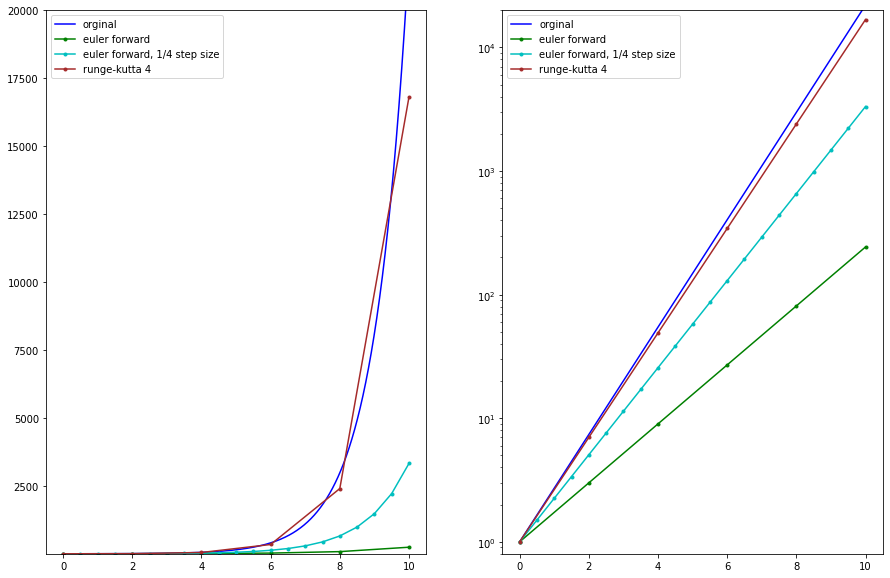

In [6]:
## testing euler forward and RK4 methods

def F(t):  # a function for testing where the derivative can be expressed in terms of the function itself
    return np.exp(t)

def f(t, y):
    # return the derivative of F
    return y

t_orig = np.linspace(0, 10, 1000)
y_orig = F(t_orig)

n0 = 5  # simulation steps
t_ef, y_ef = euler_forward(f, y0=np.array([1]), t0=0, tmax=10, n=n0)
t_ef_x4, y_ef_x4 = euler_forward(f, y0=np.array([1]), t0=0, tmax=10, n=4*n0)  # 4x simulation steps because RK4 has more computation steps
t_rk4, y_rk4 = rk4(f, y0=np.array([1]), t0=0, tmax=10, n=n0)

fig = plt.figure(figsize=(15, 10))
axes = fig.subplots(1,2)
for ax in axes:
    ax.plot(t_orig, y_orig, 'b', label='orginal')
    ax.plot(t_ef, y_ef[0], color='g', marker='.', label='euler forward')
    ax.plot(t_ef_x4, y_ef_x4[0], color='c', marker='.', label='euler forward, 1/4 step size')
    ax.plot(t_rk4, y_rk4[0], color='brown', marker='.', label='runge-kutta 4')
    ax.legend()
    ax.set_ylim(0.8, 20000)
axes[1].set_yscale('log')
plt.show()


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=ac0f8ce2-3132-47be-a4d1-6216636e93ff' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>